In [1]:
import augur

# import everything from githubapi.py and ghtorrent.py so we can
# just copy and paste our function later
import json
import re
from dateutil.parser import parse
import pandas as pd
import github
import numpy as np
import sqlalchemy as s
import datetime
import requests
import time

%matplotlib inline
# create an Augur application so we can test our function
augur_app = augur.Application()('../augur.cfg')
github = augurApp.github()
ghtorrent = augurApp.ghtorrent()

2018-05-21 11:59:04 augur[10330] INFO GHTorrent: Connecting to augurlabs.io:3306/ghtorrent as ghdata


In [2]:
def code_reviews(self, owner, repo=None):
        url = 'https://api.github.com/repos/{}/{}/pulls'.format(owner,repo)
        json = requests.get(url, auth=('user', self.GITHUB_API_KEY)).json()

        dicts = []
        pullNums = []

        for item in json:
            info = {}
            #repoID
            info['pullNum'] = item['number']
            info['state'] = item['state']
            info['createdAt'] = item['created_at']

            dicts.append(info)
            pullNums.append(item['number'])

        countReviews = []
        for index in range(0,len(pullNums)):
            url2 = 'https://api.github.com/repos/{}/{}/pulls/{}/reviews'.format(owner,repo,pullNums[index])
            j = requests.get(url2, auth=('user', self.GITHUB_API_KEY)).json()
            countReviews = np.append(countReviews, len(j))


        return pd.DataFrame(dicts).join(pd.DataFrame(data=countReviews, columns=['num_reviews']))

In [3]:
# add our new function to the class
augur.GitHubAPI.code_reviews = code_reviews

# test our function on the initialized instance
ld = github.code_reviews('rails', 'rails')


In [68]:
ld

,createdAt,pullNum,state,num_reviews
0,2018-05-18T00:13:41Z,32924,open,0.0
1,2018-05-17T23:41:13Z,32923,open,1.0
2,2018-05-17T04:08:34Z,32913,open,0.0
3,2018-05-16T22:46:33Z,32911,open,0.0
4,2018-05-15T11:12:18Z,32893,open,0.0
5,2018-05-14T11:46:45Z,32885,open,0.0
6,2018-05-14T04:00:27Z,32883,open,0.0
7,2018-05-13T22:01:19Z,32882,open,0.0
8,2018-05-13T19:41:53Z,32881,open,0.0
9,2018-05-11T18:56:53Z,32875,open,0.0


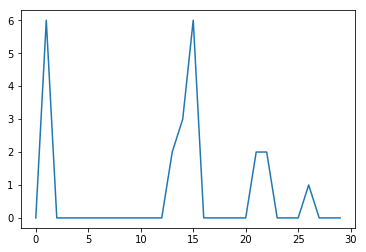

In [4]:
ld['num_reviews'].plot()


In [5]:
ld['deletions'].plot()

KeyError: 'deletions'

In [ ]:
## GraphQL Explorer note

{
  repository(owner: "OSSHealth", name: "augur") {
    pullRequests(first: 100, after: "Y3Vyc29yOnYyOpHOCy9BZQ==") {
      edges {
        cursor
        node {
          number
          createdAt
          reviews(first: 100) {
            edges {
              node {
                createdAt
                author {
                  login
                }
                createdAt
              }
            }
          }
        }
        cursor
      }
    }
  }
}